In [1]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

run_env = os.getenv('RUN_ENV', 'COLLAB')
if run_env == 'COLLAB':
  from google.colab import drive
  ROOT_DIR = '/content/drive'
  drive.mount(ROOT_DIR)
  print('Google drive connected')
  DRIVE_DATA_DIR = 'ml_course_data'
  root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', DRIVE_DATA_DIR)
else:
  root_data_dir = os.getenv('DATA_DIR', '/srv/data')

if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  print('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

Mounted at /content/drive
Google drive connected
Содержимое директории %s: %s /content/drive/MyDrive/ml_course_data ['nyt-ingredients-snapshot-2015.csv', 'insurance.csv', 'non_linear.csv', 'client_segmentation.csv', 'eigen.pkl', 'clustering.pkl', 'boosting_toy_dataset.csv', 'politic_meme.jpg', 'gray_goose.jpg', 'memes', 'optimal_push_time', 'sklearn_data', 'my_little_recsys', 'corpora', 'logs', 'nltk_data', 'recsys_data', 'MNIST', 'hymenoptera_data', 'pet_projects', 'ocr_dataset_sample.csv', 'geo_points.csv.gzip', 'scored_corpus.csv', 'labeled_data_corpus.csv', 'memes_stat_dataset.zip', 'als_model.pkl', 'raw_data.zip', 'json_views.tar.gz', 'sales_timeseries_dataset.csv.gz', 'brand_tweets_valid.csv', 'brand_tweets.csv', 'Health_and_Personal_Care.jsonl.gz', 'models', 'corpus_embeds_0.npy', 'final_dataset.zip', 'ocr_dataset.zip']


In [5]:
train_data_dir = root_data_dir

In [6]:
import pandas as pd

train_df = pd.read_csv(os.path.join(train_data_dir, 'test_data.csv'), nrows=1000)

train_df.head()

,target,flr,sellerClearPrice,hour,ssp,dsp,auctionBidFloorSource,sdk,sdkver,bundle,...,region,request_context_device_w,request_context_device_h,bidderFlrPolicy,adt,dc,contype,request_context_device_type,ifa,price
0,0,5.455349,14.010879,0,157,76,ml,BidMachine,2.1.5,gAAAAABmcEFTqdQlw0hfUdTmDmhGvCDApGMhNBnU3nIMJm...,...,ct,1200,2000,ascending auction,interstitial,US,2,5,765a66c9-229f-4356-9616-98992563fdac,18.859710
1,0,4.250000,6.810017,0,157,80,ml,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,mi,393,852,original,interstitial,US,2,4,NaN,9.166801
2,0,0.691500,2.499842,8,157,76,rollouts,BidMachine,2.5.0,gAAAAABmcEFTqdQlw0hfUdTmDmhGvCDApGMhNBnU3nIMJm...,...,bop,1080,2400,ascending auction,interstitial,US,2,4,cb62d11c-bcaf-4ac7-8503-11f7c58b57d5,3.453299
3,0,4.479847,3.356943,15,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,ks,810,1080,ascending auction,interstitial,US,2,5,A472C257-099C-492A-9024-8BF0ABCFD46C,4.518700
4,0,0.691500,1.487904,9,157,122,ml,BidMachine,1.9.10,gAAAAABmcEFTqdQlw0hfUdTmDmhGvCDApGMhNBnU3nIMJm...,...,nsw,900,1440,ascending auction,interstitial,US,2,5,63e3479f-55db-4ccd-8fa4-95afe8665357,2.055399


In [7]:
train_df['target'].value_counts(normalize=True)

,proportion
target,
0,0.883
1,0.117


In [ ]:
train_df.columns

Index(['target', 'flr', 'sellerClearPrice', 'hour', 'ssp', 'dsp',
       'auctionBidFloorSource', 'sdk', 'sdkver', 'bundle', 'os', 'lang',
       'country', 'region', 'request_context_device_w',
       'request_context_device_h', 'bidderFlrPolicy', 'adt', 'dc', 'contype',
       'request_context_device_type', 'ifa', 'price'],
      dtype='object')

In [ ]:
train_df.describe()

,target,flr,sellerClearPrice,hour,ssp,dsp,request_context_device_w,request_context_device_h,contype,request_context_device_type,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.117000,3.306324,4.012244,10.314000,157.0,80.321000,727.290000,1416.755000,2.46500,4.241000,5.424562
std,0.321581,3.429440,4.480664,7.769541,0.0,16.023193,295.340556,603.044051,1.16539,0.427904,6.042104
min,0.000000,0.010000,0.019668,0.000000,157.0,41.000000,320.000000,568.000000,2.00000,4.000000,0.020703
25%,0.000000,0.729624,0.969693,2.000000,157.0,76.000000,414.000000,896.000000,2.00000,4.000000,1.338387
50%,0.000000,2.095425,2.317421,11.000000,157.0,80.000000,768.000000,1180.000000,2.00000,4.000000,3.174486
75%,0.000000,5.387997,5.416011,18.000000,157.0,80.000000,1080.000000,1920.000000,2.00000,4.000000,7.345650
max,1.000000,35.000000,31.969147,23.000000,157.0,227.000000,1812.000000,2880.000000,7.00000,5.000000,43.032898


In [ ]:
def get_valuable_columns(input_df):
    col_subset = []
    for col in input_df.columns:
        try:
            most_frequent_value_count = input_df[col].value_counts().iloc[0]
            total_rows = len(input_df)
            if most_frequent_value_count / total_rows <= 0.95:
                col_subset.append(col)
        except (TypeError, IndexError):
            # Ignore columns that can't be analyzed (e.g. mixed data types)
            pass
    return col_subset

columns_subset = get_valuable_columns(train_df)

print(columns_subset)

['target',
 'flr',
 'sellerClearPrice',
 'hour',
 'dsp',
 'auctionBidFloorSource',
 'sdkver',
 'bundle',
 'os',
 'lang',
 'country',
 'region',
 'request_context_device_w',
 'request_context_device_h',
 'bidderFlrPolicy',
 'contype',
 'request_context_device_type',
 'ifa',
 'price']

In [ ]:
cat_candidates = ['request_context_device_type', 'dsp', 'ssp', 'hour']

features = {
    'cat': [col for col in cat_candidates if col in columns_subset],
    'num': ['price', ]
}

features

{'cat': ['request_context_device_type', 'dsp', 'hour'], 'num': ['price']}

In [ ]:
features_set = features['cat'] + features['num']
X = train_df[features_set]
y = train_df['target']

In [ ]:
from catboost import Pool, CatBoostClassifier

from IPython.display import clear_output

model = CatBoostClassifier(**{
    'loss_function': 'CrossEntropy', 'boosting_type': 'Plain',
    'bootstrap_type': 'Bernoulli', 'n_estimators': 150
})

train_pool = Pool(data=X, label=y, cat_features=features['cat'])
model.fit(train_pool)
clear_output()
print(f'Model trained: {model}')

Model trained: <catboost.core.CatBoostClassifier object at 0x12148af30>


In [ ]:
model_path = os.path.join(root_data_dir, 'model.cb')

model.save_model(model_path)
print(f'model saved to {model_path}')

model saved to /Users/username/PycharmProjects/ml_for_products/data/model.cb


Home work

* add train.py
*

In [ ]:
f_imp_df = pd.DataFrame({
    'Feature': features_set,
    'Importance': model.get_feature_importance(train_pool)
}).sort_values(by='Importance', ascending=False)

f_imp_df.head()

,Feature,Importance
1,dsp,64.638245
3,price,24.905072
2,hour,7.198156
0,request_context_device_type,3.258527


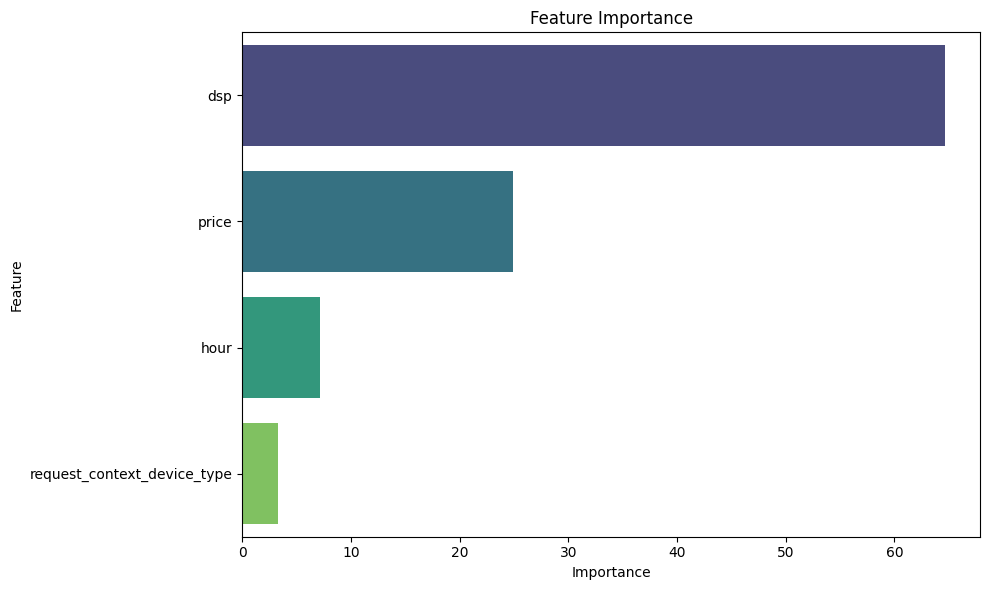

In [ ]:
from matplotlib import pyplot as plt

import seaborn as sns

def plot_feature_importances(feature_importances, output_file=None):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importances, palette='viridis', dodge=False)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)
        print(f"Plot saved to {output_file}")
    else:
        plt.show()
plot_feature_importances(f_imp_df)

# Inference

In [ ]:
inference_df = pd.read_csv(os.path.join(train_data_dir, 'test_data.csv'), nrows=1000)
X_inference = inference_df[features_set]

valid_pool = Pool(data=X_inference, cat_features=features['cat'])
valid_pool

In [ ]:
predicted_scores = model.predict_proba(valid_pool)
inference_df['score'] = predicted_scores[:, 1]

inference_df.groupby('ssp').agg(mean_score = ('score', 'mean')).sort_values(by='mean_score', ascending=False)

,mean_score
ssp,
157,0.123948


In [ ]:

import plotly.express as px

def plot_hist(filtered_df, metric_name='timedelta_seconds'):
    fig = px.histogram(
        filtered_df, x=metric_name, nbins=10,
        labels={metric_name: f'Title: {metric_name}'},
        title=f'Histogram of {metric_name}'
    )
    fig.show()

# Model registering

In [ ]:
import os
import sys

import pandas as pd
import mlflow
from mlflow.entities import ViewType
from mlflow.tracking import MlflowClient


HPO_EXPERIMENT_NAME = "catboost-params"
# mlflow.create_experiment(HPO_EXPERIMENT_NAME, artifact_location="s3://mlflow")

mlflow.set_tracking_uri("http://0.0.0.0:8000")
# mlflow.set_tracking_uri("http://mlflow_container_ui:8000")
mlflow.set_experiment(HPO_EXPERIMENT_NAME)

client = MlflowClient()
experiment = client.get_experiment_by_name(HPO_EXPERIMENT_NAME)
# choose the best params
run = client.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.roc_auc DESC"]
)
print('all complited')

all complited


In [ ]:
best_run = run[0]
best_params = best_run.data.params
best_run_id = best_run.info.run_id

In [ ]:
model_params = {i: float(j) for  i,j in best_params.items()}

In [ ]:
from dotenv import load_dotenv

load_dotenv(dotenv_path='./../.env')

True

In [ ]:
from catboost import CatBoostClassifier
from IPython.display import clear_output

def train_and_save_model(train_df, config, model_path):
    print(train_df.shape[0])
    columns_subset = get_valuable_columns(train_df)
    cat_candidates = ['request_context_device_type', 'dsp', 'ssp', 'hour']
    features = {
        'cat': [col for col in cat_candidates if col in columns_subset],
        'num': ['price', ]
    }
    features_set = features['cat'] + features['num']
    X = train_df[features_set]
    y = train_df['target']
    train_pool = Pool(data=X, label=y, cat_features=features['cat'])
    model = CatBoostClassifier(**model_params)
    model.fit(train_pool)
    clear_output()
    model.save_model(model_path)
    mlflow.log_artifact(model_path, artifact_path="model")
    print('model dump finished')

train_data_path = '/Users/username/PycharmProjects/ml_for_products/data/bidmachine_task_data/test_data.csv'
model_path = '/Users/username/PycharmProjects/ml_for_products/data/bidmachine_task_data/best_model.cb'

with mlflow.start_run(run_id=best_run_id):
    train_df = pd.read_csv(train_data_path, nrows=1000)
    train_and_save_model(train_df, best_params, model_path)
    model_uri = f"runs:/{best_run_id}/model"
    mlflow.register_model(model_uri, name="rf-best-model")
print('Model loaded')

Registered model 'rf-best-model' already exists. Creating a new version of this model...
2024/11/08 20:51:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf-best-model, version 5
Created version '5' of model 'rf-best-model'.
2024/11/08 20:51:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run agreeable-goose-843 at: http://0.0.0.0:8000/#/experiments/1/runs/95b91cd25bef48d8b7846ffe445f294b.
2024/11/08 20:51:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:8000/#/experiments/1.


model dump finished
Model loaded


In [ ]:
with mlflow.start_run(run_id=best_run_id) as active_run:
    artifacts = client.list_artifacts(active_run.info.run_id)
    for artifact in artifacts:
        print(f"Artifact: {artifact.path}, Size: {artifact.file_size}")
    artifact_uri = mlflow.get_artifact_uri()
    print(f"Artifact URI: {artifact_uri}")
    model_uri = os.path.join(artifact_uri, "model")
    print(f"Model URI: {model_uri}")

2024/11/08 20:56:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run agreeable-goose-843 at: http://0.0.0.0:8000/#/experiments/1/runs/95b91cd25bef48d8b7846ffe445f294b.
2024/11/08 20:56:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:8000/#/experiments/1.


Artifact: model, Size: None
Artifact URI: s3://mlflow/95b91cd25bef48d8b7846ffe445f294b/artifacts
Model URI: s3://mlflow/95b91cd25bef48d8b7846ffe445f294b/artifacts/model


Check model in interface

In [ ]:
import boto3

s3_client = boto3.client('s3',
        aws_access_key_id=os.environ['AWS_ACCESS_KEY_ID'],
        aws_secret_access_key=os.environ['AWS_SECRET_ACCESS_KEY'],
        endpoint_url='http://0.0.0.0:9000'
)
bucket = "mlflow"
key = model_uri.replace(f's3://mlflow/', '')
print(key)
local_path = os.path.join(root_data_dir, "downloaded_model.cb")

s3_client.download_file(bucket, os.path.join(key, 'best_model.cb'), local_path)
print(f'downloaded to {local_path}')

95b91cd25bef48d8b7846ffe445f294b/artifacts/model
downloaded to /Users/username/PycharmProjects/ml_for_products/data/downloaded_model.cb
